<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/practice3.png' width=300/></center>

# 소매점 판매 현황

<img src='https://raw.githubusercontent.com/Jangrae/img/master/retail.png' width="650" align="left">

## 1.환경 설정

- 데이터 탐색과 전처리를 하기 전 라이브러리와 파일을 읽어옵니다.
- 시각화에 한글이 포함된 경우 이에 대한 설정을 진행합니다.

**1) 한글 설정**

- Jupyter Notebook 시각화에 한글이 표시되게 설정합니다.

In [43]:
# 라이브러리 불러오기
import matplotlib 
import matplotlib.pyplot as plt

# 폰트설정
matplotlib.font_manager._rebuild()
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

**2) 라이브러리 불러오기**

- 사용할 라이브러리를 불러옵니다.

In [44]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

**3) 데이터 읽어오기**

- 다음 경로의 파일을 읽어와 customers, products, orders 데이터프레임을 만듭니다.
- 파일 경로1: 'https://raw.githubusercontent.com/Jangrae/csv/master/customers.csv'    
- 파일 경로2: 'https://raw.githubusercontent.com/Jangrae/csv/master/products.csv'
- 파일 경로3: 'https://raw.githubusercontent.com/Jangrae/csv/master/orders.csv'
- 단축 경로1: 'https://bit.ly/CustomersFile'    
- 단축 경로2: 'https://bit.ly/ProductsFile'  
- 단축 경로3: 'https://bit.ly/OrdersFile'  

In [45]:

path1 = 'https://bit.ly/CustomersFile'
customers = pd.read_csv(path1)

customers.head()

,CustomerID,RegisterDate,Address,Gender,BirthYear,Addr1,Addr2
0,c017487,2002-07-31,경기 성남시 중원구 둔촌대로190번길,F,1968,경기도,성남시
1,c017503,2002-07-31,서울 마포구 새터산12길,F,1971,서울특별시,마포구
2,c017517,2002-07-31,경기도 남양주시 와부읍 덕소로,M,1967,경기도,남양주시
3,c017522,2002-07-31,강원도 원주시 단구로,F,1965,강원도,원주시
4,c017526,2002-07-31,경기도 부천시 오정구 소사로730번길,F,1960,경기도,부천시


In [46]:
path2 = 'https://bit.ly/ProductsFile' #CategoryOrd는 무시
products = pd.read_csv(path2)

products.head()

,ProductID,ProductName,Category,SubCategory,CategoryOrd
0,p1001771,마늘,채소,뿌리채소,5
1,p1002841,딸기_대,과일,과채,2
2,p1005621,숙주나물,반찬류,나물류,1
3,p1005771,두부_소,반찬류,두부,1
4,p1005891,두부_대,반찬류,두부,1


In [47]:
path3 = 'https://bit.ly/OrdersFile'
orders = pd.read_csv(path3)

orders.head()



,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID
0,1,1,2016-01-02,p1030071,2,7900,c107853
1,2,1,2016-01-02,p1012761,1,1700,c110521
2,2,2,2016-01-02,p1012581,1,1000,c110521
3,2,3,2016-01-02,p1175481,1,1300,c110521
4,2,4,2016-01-02,p1178011,1,8800,c110521


## 2.데이터 탐색

다음과 같은 정보 확인을 통해 처리할 대상 데이터를 이해합니다.
- 상/하위 데이터 확인
- 데이터프레임 크기 확인
- 열 이름, 데이터 형식, 값 개수 등 확인
- 기초 통계정보 확인
- 결측치 확인
- 범주형 데이터 확인
- 개별 열 값 상세 확인 등

**1) 고객 정보(customers) 4가지 이상 탐색**

- customers 데이터프레임을 충분히 탐색합니다.
- 간단한 집계를 수행해 보는 것도 좋은 방법입니다.

In [48]:
#행,열 개수 확인

customers.shape

(2243, 7)

In [49]:
#결측치 확인

customers.isnull().sum()

CustomerID      0
RegisterDate    0
Address         0
Gender          0
BirthYear       0
Addr1           0
Addr2           0
dtype: int64

In [50]:
#기초통계정보

customers.describe()

,BirthYear
count,2243.000000
mean,1971.107445
std,9.658465
min,1932.000000
25%,1966.000000
50%,1972.000000
75%,1978.000000
max,1999.000000


In [51]:
#통계 정보

customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2243 entries, 0 to 2242
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    2243 non-null   object
 1   RegisterDate  2243 non-null   object
 2   Address       2243 non-null   object
 3   Gender        2243 non-null   object
 4   BirthYear     2243 non-null   int64 
 5   Addr1         2243 non-null   object
 6   Addr2         2243 non-null   object
dtypes: int64(1), object(6)
memory usage: 122.8+ KB


In [52]:
#성별(Gender) 정보

customers['Gender'].value_counts(False)

F    2060
M     183
Name: Gender, dtype: int64

In [53]:
#출생년 정보

customers['BirthYear'].value_counts(False)

1973    122
1971    116
1974    107
1979    105
1970    104
       ... 
1939      2
1936      1
1994      1
1995      1
1999      1
Name: BirthYear, Length: 62, dtype: int64

In [54]:
#시군 정보

customers['Addr1'].value_counts(False)

경기도      1260
서울특별시     564
인천광역시     325
강원도        62
충청북도        8
대구광역시       8
충청남도        6
광주광역시       3
전라남도        3
경상북도        2
경상남도        1
전라북도        1
Name: Addr1, dtype: int64

In [55]:
#등록일 정보

customers['RegisterDate'].value_counts(False)

2002-07-31    40
2015-12-26     6
2014-03-10     5
2009-09-02     5
2016-01-11     5
              ..
2006-06-01     1
2013-11-08     1
2009-02-02     1
2015-07-22     1
2012-03-06     1
Name: RegisterDate, Length: 1642, dtype: int64

**2) 상품 정보(products) 4가지 이상 탐색**

- products 데이터프레임을 충분히 탐색합니다.
- 간단한 집계를 수행해 보는 것도 좋은 방법입니다.

In [56]:
#행,열 개수 확인

products.shape

(62, 5)

In [57]:
#결측치 확인

products.isnull().sum()

ProductID      0
ProductName    0
Category       0
SubCategory    0
CategoryOrd    0
dtype: int64

In [58]:
#제품군(Category) 종류 확인

products['Category'].value_counts(False)

채소     23
유제품    14
간식     11
반찬류     8
과일      6
Name: Category, dtype: int64

In [59]:
#제품(ProductName) 확인

products['ProductName'].value_counts(False)

당근         3
감자칩        2
양배출        1
사과_대       1
무          1
무농약시금치     1
팽이버섯       1
우유1000     1
통단팥빵       1
뿌셔뿌셔       1
팥아이스크림     1
참외         1
딸기요거트      1
소보루빵       1
두부_대       1
마늘         1
플레인요거트     1
고구마스틱      1
열무         1
사과아이스크림    1
콘칩         1
딸기아이스크림    1
순두부        1
딸기_대       1
청오이        1
양파         1
두부_소       1
새우깡        1
콩나물        1
초코아이스크림    1
느타리버섯      1
초코콘        1
애호박        1
깻잎         1
낱개캔디       1
백오이        1
브로컬리       1
초코우유       1
연두부        1
감귤컵푸딩      1
쌈모음        1
상추         1
피망         1
토마토        1
숙주나물       1
저지방우유      1
딸기_소       1
시금치        1
배아이스크림     1
유부         1
우유200      1
포도컵푸딩      1
부침용두부      1
파          1
사과_소       1
짱구         1
부추         1
포토아이스크림    1
유기농우유      1
Name: ProductName, dtype: int64

In [60]:
#제품목록(Category, SubCategory) 종류 확인

products[['Category', 'SubCategory']].value_counts()

Category  SubCategory
채소        뿌리채소           9
          잎채소            8
유제품       아이스크림          7
간식        과자             6
반찬류       두부             6
유제품       우유             5
과일        과채             4
채소        열매채소           4
간식        사탕류            3
          빵              2
과일        과수             2
반찬류       나물류            2
유제품       요거트            2
채소        버섯             2
dtype: int64

In [61]:
#혹시 ProductID가 중복되는 값이 있는지?

products['ProductID'].value_counts(False)

p1234751    1
p1149391    1
p1256521    1
p1012811    1
p1233511    1
           ..
p1162631    1
p1012751    1
p1179241    1
p1144371    1
p1013251    1
Name: ProductID, Length: 62, dtype: int64

In [62]:
#(진행중) 문자열에서 ''-소 -대' 떼기


**3) 주문 정보(orders) 4가지 이상 탐색**

- orders 데이터프레임을 충분히 탐색합니다.
- 간단한 집계를 수행해 보는 것도 좋은 방법입니다.

In [63]:
#orders 행, 열 개수 확인

orders.shape

(68839, 7)

In [64]:
#결측치 확인

orders.isnull().sum()

OrderID       0
Seq           0
OrderDate     0
ProductID     0
Qty           0
Amt           0
CustomerID    0
dtype: int64

In [65]:
#어떤 날짜에 몰렸는지?

orders['OrderDate'].value_counts(False)

2016-02-06    313
2017-01-26    285
2016-05-02    279
2016-09-02    255
2016-09-13    253
             ... 
2016-09-11     69
2016-10-16     68
2016-12-25     67
2016-07-10     66
2017-02-26     59
Name: OrderDate, Length: 447, dtype: int64

In [66]:
#매출액 집계

orders['Income'] = orders['Qty'] * orders['Amt']

orders.head()

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID,Income
0,1,1,2016-01-02,p1030071,2,7900,c107853,15800
1,2,1,2016-01-02,p1012761,1,1700,c110521,1700
2,2,2,2016-01-02,p1012581,1,1000,c110521,1000
3,2,3,2016-01-02,p1175481,1,1300,c110521,1300
4,2,4,2016-01-02,p1178011,1,8800,c110521,8800


In [67]:
#어떤 상품을 많이 주문했지?

orders['ProductID'].value_counts(False)

p1175481    4905
p1005891    3937
p1072601    3480
p1005771    3378
p1012751    2856
            ... 
p1152861     417
p1006281     373
p1149381     345
p1234751     277
p1201601     260
Name: ProductID, Length: 62, dtype: int64

In [68]:
#언제 주문이 많이 몰렸나

orders['OrderDate'].value_counts(False)

2016-02-06    313
2017-01-26    285
2016-05-02    279
2016-09-02    255
2016-09-13    253
             ... 
2016-09-11     69
2016-10-16     68
2016-12-25     67
2016-07-10     66
2017-02-26     59
Name: OrderDate, Length: 447, dtype: int64

In [69]:
#날짜 정리

orders['OrderDate'] = orders['OrderDate'].str.replace(pat=r'[^\w]', repl=r'', regex=True)

orders.head()

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID,Income
0,1,1,20160102,p1030071,2,7900,c107853,15800
1,2,1,20160102,p1012761,1,1700,c110521,1700
2,2,2,20160102,p1012581,1,1000,c110521,1000
3,2,3,20160102,p1175481,1,1300,c110521,1300
4,2,4,20160102,p1178011,1,8800,c110521,8800


## 3.데이터 전처리

전처리 과정에서 다음과 같은 처리를 할 수 있습니다.

- 결측치 처리
- 값 변경
- 열 추가
- 불필요한 열 제거
- 열 이름 변경
- 데이터 통합(연결 또는 조인)
- 가변수화 등

**1) 데이터 통합 --> sales 데이터프레임**

- 각 데이터프레임의 모든 열을 통합 할 것이 아니면 
    - 필요한 열만 추출해 별도 데이터프레임을 선언한 후 통합하거나
    - 또는 모두 통합 후 불필요한 열을 제거하는 방법을 사용합니다.
    
- 통합 방안
    - 사용할 데이터만 가져와서 통합
    - concat, join(merge) 방법 중 선택

In [70]:
#Products 열 정리

productscol = ['ProductID', 'ProductName', 'Category', 'SubCategory']

products = products.loc[ : , productscol]

products.head()

,ProductID,ProductName,Category,SubCategory
0,p1001771,마늘,채소,뿌리채소
1,p1002841,딸기_대,과일,과채
2,p1005621,숙주나물,반찬류,나물류
3,p1005771,두부_소,반찬류,두부
4,p1005891,두부_대,반찬류,두부


In [71]:
#1차 병합(products - orders)
# Seq = 순서, OrderID = 주문번호

sales = pd.merge(products, orders, on = 'ProductID', how = 'inner')

sales.head()

,ProductID,ProductName,Category,SubCategory,OrderID,Seq,OrderDate,Qty,Amt,CustomerID,Income
0,p1001771,마늘,채소,뿌리채소,38,1,20160102,1,3150,c115512,3150
1,p1001771,마늘,채소,뿌리채소,28,1,20160103,1,3150,c083862,3150
2,p1001771,마늘,채소,뿌리채소,30,2,20160103,1,3150,c304973,3150
3,p1001771,마늘,채소,뿌리채소,35,1,20160104,1,3150,c088320,3150
4,p1001771,마늘,채소,뿌리채소,52,1,20160104,1,3150,c280766,3150


In [72]:
#sales 열 정리

salescol = ['ProductName','Category','SubCategory','OrderDate','Qty','Amt','CustomerID','Income']
sales = sales.loc[ : , salescol]

sales.head()

,ProductName,Category,SubCategory,OrderDate,Qty,Amt,CustomerID,Income
0,마늘,채소,뿌리채소,20160102,1,3150,c115512,3150
1,마늘,채소,뿌리채소,20160103,1,3150,c083862,3150
2,마늘,채소,뿌리채소,20160103,1,3150,c304973,3150
3,마늘,채소,뿌리채소,20160104,1,3150,c088320,3150
4,마늘,채소,뿌리채소,20160104,1,3150,c280766,3150


In [73]:
#편의사항 - customers 불러오기
customerscol = ['CustomerID','RegisterDate', 'Addr1', 'Addr2', 'Address','BirthYear','Gender']
customers = customers.loc[ : , customerscol]

customers.head()

,CustomerID,RegisterDate,Addr1,Addr2,Address,BirthYear,Gender
0,c017487,2002-07-31,경기도,성남시,경기 성남시 중원구 둔촌대로190번길,1968,F
1,c017503,2002-07-31,서울특별시,마포구,서울 마포구 새터산12길,1971,F
2,c017517,2002-07-31,경기도,남양주시,경기도 남양주시 와부읍 덕소로,1967,M
3,c017522,2002-07-31,강원도,원주시,강원도 원주시 단구로,1965,F
4,c017526,2002-07-31,경기도,부천시,경기도 부천시 오정구 소사로730번길,1960,F


**2) 결과 확인 -- 통합 결과 확인**

In [74]:
#최종 통합(sales, customers)

Sales = pd.merge(sales, customers, on = 'CustomerID', how = 'inner')

Sales.head()

,ProductName,Category,SubCategory,OrderDate,Qty,Amt,CustomerID,Income,RegisterDate,Addr1,Addr2,Address,BirthYear,Gender
0,마늘,채소,뿌리채소,20160102,1,3150,c115512,3150,2008-11-20,경기도,김포시,경기도 김포시 전원로,1980,F
1,마늘,채소,뿌리채소,20160301,1,3300,c115512,3300,2008-11-20,경기도,김포시,경기도 김포시 전원로,1980,F
2,마늘,채소,뿌리채소,20160316,1,3300,c115512,3300,2008-11-20,경기도,김포시,경기도 김포시 전원로,1980,F
3,마늘,채소,뿌리채소,20160828,1,3100,c115512,3100,2008-11-20,경기도,김포시,경기도 김포시 전원로,1980,F
4,마늘,채소,뿌리채소,20161118,1,3100,c115512,3100,2008-11-20,경기도,김포시,경기도 김포시 전원로,1980,F


**3) 열 추가**

- 분석을 위해 필요한 열을 추가합니다.
- 예를 들어 다음과 같은 열들이 필요하다고 판단할 수 있습니다.
    - OrderYear: 주문연도, 주문연도별 분석이 용이하게 하기 위함
    - OrderMonth: 주문월, 주문년월 분석이 용이하게 하기 위함
    - Age: 연령별 분석을 하기 위함(2017 - 출생년도) 등등

* 나이 구하기(age) - 2017년 기준

In [75]:
#나이 구하기 (2017 - BirthYear)

Sales['Age'] = 2017 - Sales['BirthYear']

Sales.head()

,ProductName,Category,SubCategory,OrderDate,Qty,Amt,CustomerID,Income,RegisterDate,Addr1,Addr2,Address,BirthYear,Gender,Age
0,마늘,채소,뿌리채소,20160102,1,3150,c115512,3150,2008-11-20,경기도,김포시,경기도 김포시 전원로,1980,F,37
1,마늘,채소,뿌리채소,20160301,1,3300,c115512,3300,2008-11-20,경기도,김포시,경기도 김포시 전원로,1980,F,37
2,마늘,채소,뿌리채소,20160316,1,3300,c115512,3300,2008-11-20,경기도,김포시,경기도 김포시 전원로,1980,F,37
3,마늘,채소,뿌리채소,20160828,1,3100,c115512,3100,2008-11-20,경기도,김포시,경기도 김포시 전원로,1980,F,37
4,마늘,채소,뿌리채소,20161118,1,3100,c115512,3100,2008-11-20,경기도,김포시,경기도 김포시 전원로,1980,F,37


In [76]:
#제품 단가 구하기 == Amt / Qty

Sales['Price'] = Sales['Amt'] / Sales['Qty']

Sales.head()

,ProductName,Category,SubCategory,OrderDate,Qty,Amt,CustomerID,Income,RegisterDate,Addr1,Addr2,Address,BirthYear,Gender,Age,Price
0,마늘,채소,뿌리채소,20160102,1,3150,c115512,3150,2008-11-20,경기도,김포시,경기도 김포시 전원로,1980,F,37,3150.0
1,마늘,채소,뿌리채소,20160301,1,3300,c115512,3300,2008-11-20,경기도,김포시,경기도 김포시 전원로,1980,F,37,3300.0
2,마늘,채소,뿌리채소,20160316,1,3300,c115512,3300,2008-11-20,경기도,김포시,경기도 김포시 전원로,1980,F,37,3300.0
3,마늘,채소,뿌리채소,20160828,1,3100,c115512,3100,2008-11-20,경기도,김포시,경기도 김포시 전원로,1980,F,37,3100.0
4,마늘,채소,뿌리채소,20161118,1,3100,c115512,3100,2008-11-20,경기도,김포시,경기도 김포시 전원로,1980,F,37,3100.0


**4) 불필요한 열 제거 --> 불필요한 이유 명시**

- 분석에 필요가 없다고 생각되는 열은 제거합니다.
- 새로운 열을 추가하면 기존 열이 필요하지 않을 수 있습니다.
- 예를 들어 다음 열들이 필요하지 않다고 판단할 수 있습니다.
    - OrderDate: 새로 추가한 OrderYear, OrderMonth 열 사용
    - ProductID: ProductName 열 사용
    - SubCategory: 분석 대상에서 제외 등등

In [77]:
#Income 제거 - 잘못 구함
#Address 제거 - Addr1과 Addr2 조합으로 해결 가능
#RegisterDate 제거 - 매출과 유의미한 상관관계를 찾기 어렵다

Salescol = ['ProductName','Category','SubCategory','OrderDate','Price','Qty','Amt','CustomerID','Age','Gender','Addr1','Addr2']
Sales = Sales.loc[ : , Salescol]

Sales.head()

,ProductName,Category,SubCategory,OrderDate,Price,Qty,Amt,CustomerID,Age,Gender,Addr1,Addr2
0,마늘,채소,뿌리채소,20160102,3150.0,1,3150,c115512,37,F,경기도,김포시
1,마늘,채소,뿌리채소,20160301,3300.0,1,3300,c115512,37,F,경기도,김포시
2,마늘,채소,뿌리채소,20160316,3300.0,1,3300,c115512,37,F,경기도,김포시
3,마늘,채소,뿌리채소,20160828,3100.0,1,3100,c115512,37,F,경기도,김포시
4,마늘,채소,뿌리채소,20161118,3100.0,1,3100,c115512,37,F,경기도,김포시


**5) 값 변경 - 시각화했을 때 보기 쉽도록**

In [78]:
# M / F를 남 / 여 로 바꿔보자

Sales.loc[Sales['Gender'] == 'M', 'Gender'] = '남'
Sales.loc[Sales['Gender'] == 'F', 'Gender'] = '여'

#확인해 보자

Sales['Gender'].value_counts()

여    62662
남     6177
Name: Gender, dtype: int64

## 4.데이터 분석

- 현재 판매 현황을 분석해 향후 판매 전략 수립에 중요한 정보로 활용할 것입니다.
- 데이터를 집계하고 간단히 시각화하여 판매 현황을 분석합니다.
- 연속형 값은 선 그래프, 범주형 값은 막대 그래프로 시각화함이 일반적입니다.

**1) 남녀별 판매 현황**

- 남녀별 판매 현황을 막대 그래프로 시각화해 확인합니다.

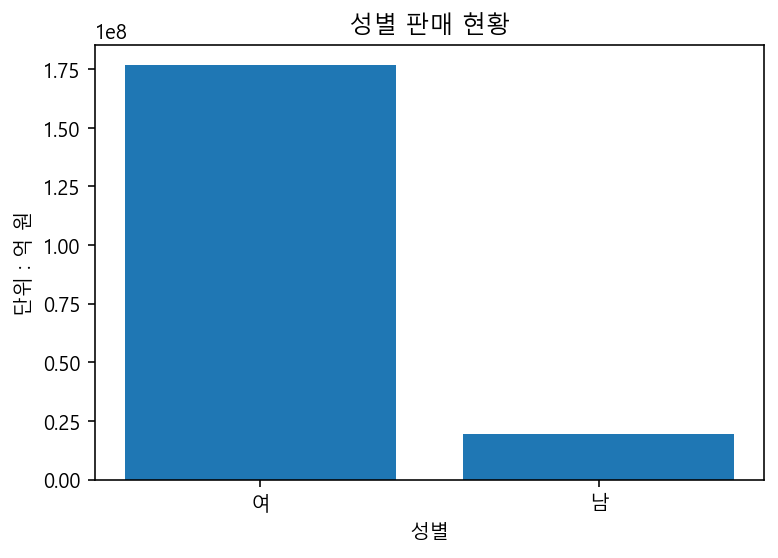

In [79]:
#데이터 시각화(막대그래프)

gen = Sales.groupby(by = 'Gender', as_index = False)['Amt'].sum()
gen.sort_values(by = 'Amt', ascending = False, inplace = True)

plt.bar(gen['Gender'],gen['Amt'])
plt.xlabel('성별')
plt.title('성별 판매 현황')
plt.ylabel('단위 : 억 원')
plt.show()

**2) 지역별 판매 현황**

- 지역별 판매 현황을 막대 그래프로 시각화해 확인합니다.

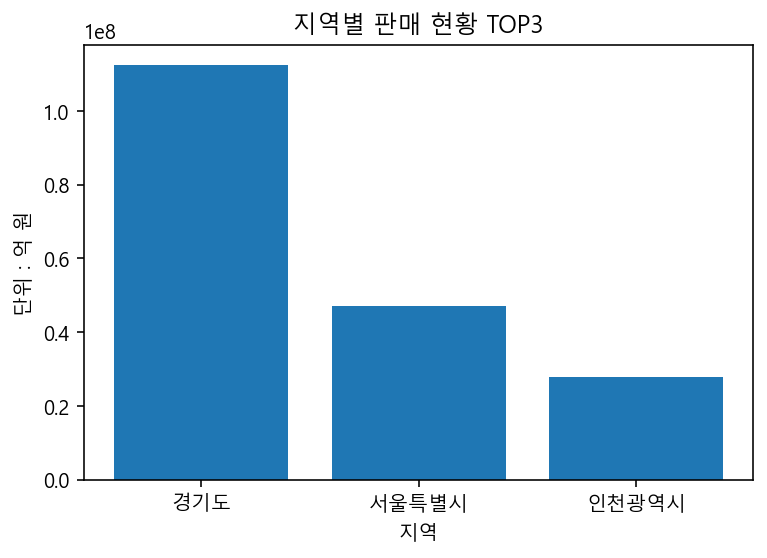

In [80]:
#데이터 시각화(막대그래프) - 지역별

gen = Sales.groupby(by = 'Addr1', as_index = False)['Amt'].sum()
gen.sort_values(by = 'Amt', ascending = False, inplace = True)
gen = gen.head(3)

plt.bar(gen['Addr1'],gen['Amt'])
plt.xlabel('지역')
plt.title('지역별 판매 현황 TOP3')
plt.ylabel('단위 : 억 원')
plt.show()

**3) 추가**

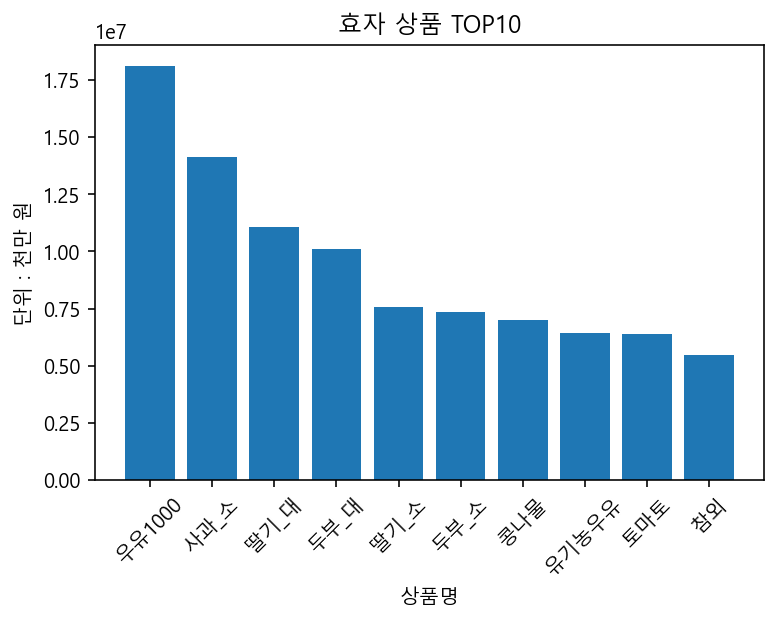

In [81]:
#품목 별 효자상품 찾기

popular = Sales.groupby(by = 'ProductName', as_index = False)['Amt'].sum()
popular.sort_values(by = 'Amt', ascending = False, inplace = True)
popular = popular.head(10)

#시각화

plt.bar(popular['ProductName'],popular['Amt'])
plt.xlabel('상품명')
plt.xticks(rotation = 45)
plt.title('효자 상품 TOP10')
plt.ylabel('단위 : 천만 원')
plt.show()

**3-1) 효자 상품의 가격**

In [82]:
#(진행중)효자 상품의 1단위당 가격

popularp = Sales.groupby(by = ['ProductName','Price'] , as_index = False)['Amt'].max()
popularp.sort_values(by = 'Amt', ascending = False, inplace = True)
popularp = popularp.head(10)

popularp.head()
#시각화

,ProductName,Price,Amt
619,통단팥빵,1091.0,109100
328,소보루빵,864.0,86400
269,사과_대,6800.0,81600
270,사과_대,6900.0,69000
127,딸기_대,15009.0,60036


**4) 추가**

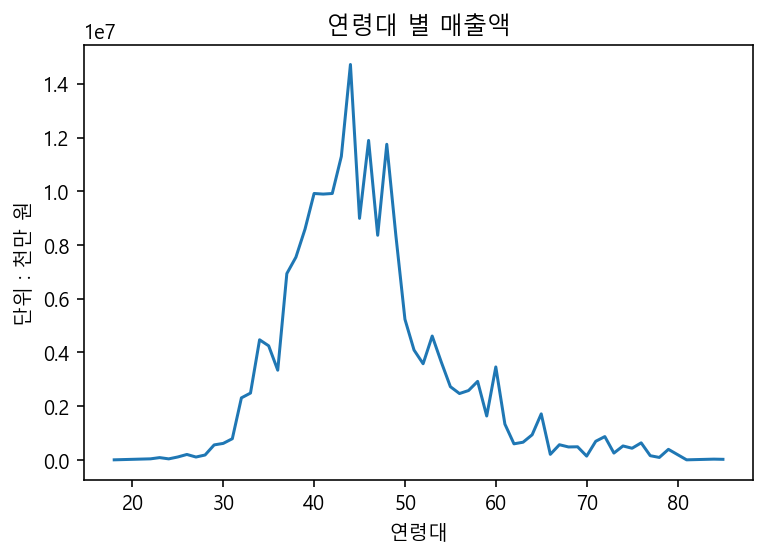

In [83]:
#연령대 별 매출액

cohort = Sales.groupby(by = 'Age', as_index = False)['Amt'].sum()
cohort.sort_values(by = 'Age', ascending = True, inplace = True)

#시각화

plt.plot(cohort['Age'],cohort['Amt'])
plt.ylabel('단위 : 천만 원')
plt.xlabel('연령대')
plt.title('연령대 별 매출액')
plt.show()


**5) 추가**

In [84]:
#월별 판매액(진행중)

month = Sales.groupby(by = 'OrderDate', as_index = False)['Amt'].sum()
month.sort_values(by = 'OrderDate', ascending = True, inplace = True)


#시각화

# plt.bar(month['OrderDate'].str[0:4] + ' 년 ' + month['OrderDate'].str[4:6] + ' 월',month['Amt'])
# plt.xticks(rotation = 80)
# plt.ylabel('단위 : 백만 원')
# plt.title('2016년 1월 ~ 2017년 3월 간 월별 판매액')
# plt.show()



## 5.고객 분류

* 고객을 등급을 나눠 판매 현황을 분석하고 이에 따른 판매 전략을 수립하려합니다.
- 우선 고객을 일정 기준에 따라 분류하고 등급을 지정해야 합니다.
- 다음과 같은 순서로 처리하면 될 것입니다.
    - 고객별 주문 수량 합, 판매 금액 합을 갖는 데이터프레임 선언
    - 고객 분류 기준과 이 기준에 따른 등급 이름 정의
    - 고객 등급을 갖는 새로운 Level 열 추가

In [85]:
Sales.head()

,ProductName,Category,SubCategory,OrderDate,Price,Qty,Amt,CustomerID,Age,Gender,Addr1,Addr2
0,마늘,채소,뿌리채소,20160102,3150.0,1,3150,c115512,37,여,경기도,김포시
1,마늘,채소,뿌리채소,20160301,3300.0,1,3300,c115512,37,여,경기도,김포시
2,마늘,채소,뿌리채소,20160316,3300.0,1,3300,c115512,37,여,경기도,김포시
3,마늘,채소,뿌리채소,20160828,3100.0,1,3100,c115512,37,여,경기도,김포시
4,마늘,채소,뿌리채소,20161118,3100.0,1,3100,c115512,37,여,경기도,김포시


**1) 고객별 집계**

* 고객별 주문 수량 합, 판매 금액 합을 갖는 cst 데이터프레임을 선언합니다.

In [86]:
cstq = Sales.groupby(by = 'CustomerID', as_index = False)['Qty'].sum()
csta = Sales.groupby(by = 'CustomerID', as_index = False)['Amt'].sum()

csta.head()



,CustomerID,Amt
0,c017487,296447
1,c017503,160444
2,c017517,317590
3,c017522,219849
4,c017526,48881


**2) 고객 분류 기준 찾기**

- 고객 등급 분류 기준을 찾기 위해 관련 데이터를 확인합니다.

In [87]:
cstq.describe()


,Qty
count,2237.000000
mean,38.988824
std,63.216430
min,1.000000
25%,4.000000
50%,13.000000
75%,47.000000
max,1008.000000


**3) 고객 분류 기준 정리**

- 고객 등급 분류 기준과 그 기준에 따른 등급 이름을 정리합니다.
- 예를 들면 다음과 같은 기준과 등급 이름을 정의할 수 있을 것입니다.
    - ~ 30,000: Family
    - 30,000 ~ 100,000: Bronze
    - 100,000 ~ 300,000: Silver
    - 300,000 ~ : Gold
    - 600,000 ~ : Platinum
- 분류 기준과 등급 이름
   - ~300,000 : Smart
   -  300,000 ~ 500,000 : Modern
   -  500,000 ~ 100,000 : Prestige
   -  1,000,000 ~ : Limited

**4) 고객 등급 반영**

- 각자 정의한 기준에 따라 고객 등급을 Level 열로 저장합니다.

In [88]:
#구간별로 등급 정해주기(cstq)
#10개까지 : Disciple
#11~ 30개 : Mentor
#30개 이상 50개 미만: Instructor
#50개 이상 : Executor

bin2 = [-np.inf,11,31,51, np.inf]
classifyq = ['Disciple','Mentor','Instructor','Executor']
cstq['Class'] = pd.cut(cstq['Qty'], bins = bin2, labels = list(classifyq))

cstq.head(10)

,CustomerID,Qty,Class
0,c017487,127,Executor
1,c017503,42,Instructor
2,c017517,192,Executor
3,c017522,64,Executor
4,c017526,26,Mentor
5,c017531,77,Executor
6,c017538,90,Executor
7,c017544,188,Executor
8,c017546,50,Instructor
9,c017551,12,Mentor


In [89]:
#구간별로 등급 정해주기(csta)
# - ~300,000 : Smart
# -  300,000 ~ 500,000 : Modern
# -  500,000 ~ 100,000 : Prestige
# -  1,000,000 ~ : Limited
    
bin = [-np.inf,300000,500000,1000000, np.inf]
classify = ['Smart','Modern','Prestige','Nobless']
csta['Level'] = pd.cut(csta['Amt'], bins = bin, labels = list(classify))

csta.head(10)

,CustomerID,Amt,Level
0,c017487,296447,Smart
1,c017503,160444,Smart
2,c017517,317590,Modern
3,c017522,219849,Smart
4,c017526,48881,Smart
5,c017531,103078,Smart
6,c017538,135464,Smart
7,c017544,511038,Prestige
8,c017546,175031,Smart
9,c017551,36950,Smart


- 등급별 고객 수를 확인해 등급이 적절히 나뉘었는지 검증합니다.
- 검증 결과가 적절하지 않다면 위 기준을 변경해 등급을 다시 나눕니다.

In [90]:
#등급별로 몇 명 있는지 보자(csta)

bin = [-np.inf,300000,500000,1000000, np.inf]
classify = ['Smart','Modern','Prestige','Nobless']
csta['Level'] = pd.cut(csta['Amt'], bins = bin, labels = list(classify))

csta['Level'].value_counts(False)

Smart       2061
Modern       116
Prestige      54
Nobless        6
Name: Level, dtype: int64

In [91]:
#등급별로 몇 명 있는지 보자(csta)

bin2 = [-np.inf,11,31,51, np.inf]
classifyq = ['Disciple','Mentor','Instructor','Executor']
cstq['Class'] = pd.cut(cstq['Qty'], bins = bin2, labels = list(classifyq))

cstq['Class'].value_counts(False)

Disciple      1033
Executor       523
Mentor         467
Instructor     214
Name: Class, dtype: int64

## 6.등급별 고객 분석

- 고객 등급을 기준으로 다양한 분석을 진행합니다.
- 등급 별 분석은 판매 전략을 새롭게 수립하는 데 중요한 자료가 될 것입니다.
- 분석 과정에서 판매 전략에 대한 부분을 고민해 보시기 바랍니다.

**1) 등급별 판매 수량**

- 고객 등급별 판매 수량을 막대 그래프로 시각화해 확인합니다.

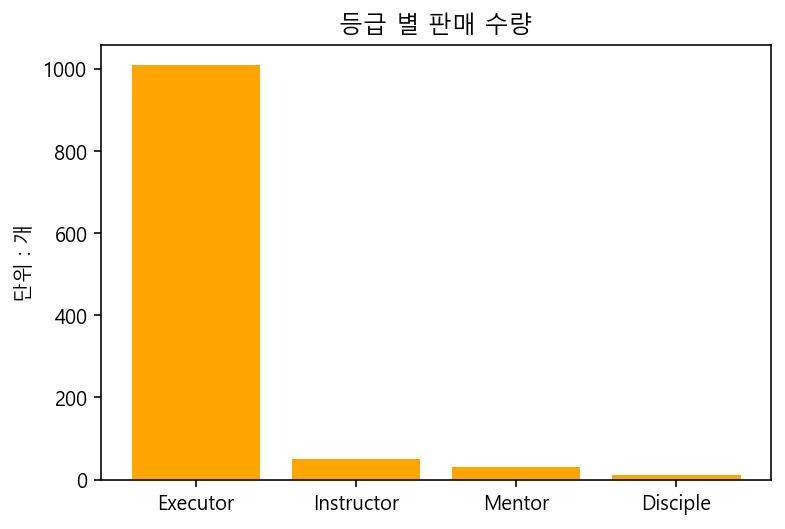

In [92]:
#cstq 시각화

plt.bar(cstq['Class'],cstq['Qty'], color = 'orange')
plt.title('등급 별 판매 수량')
plt.ylabel('단위 : 개')
plt.show()



**2) 등급별 판매 금액**

- 고객 등급별 판매 금액을 막대 그래프로 시각화해 확인합니다. 

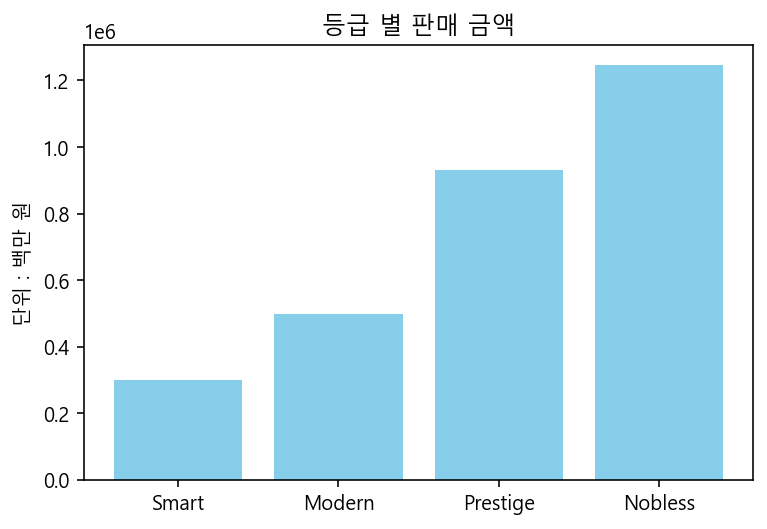

In [93]:
#csta 시각화

plt.bar(csta['Level'],csta['Amt'], color = 'skyblue')
plt.title('등급 별 판매 금액')
plt.ylabel('단위 : 백만 원')
plt.show()

**3) 추가**

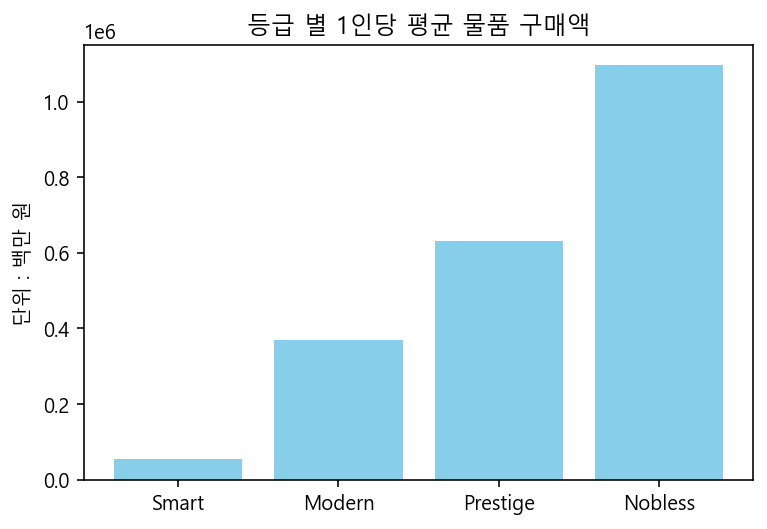

In [94]:
 #등급별 평균 물품 구매액


csta_avg = csta.groupby(by = 'Level', as_index = False)['Amt'].mean()
csta_avg.reset_index (drop = True, inplace = True)

#시각화

plt.bar(csta_avg['Level'],csta_avg['Amt'], color = 'skyblue')
plt.title('등급 별 1인당 평균 물품 구매액')
plt.ylabel('단위 : 백만 원')
plt.show()

**4) 추가**

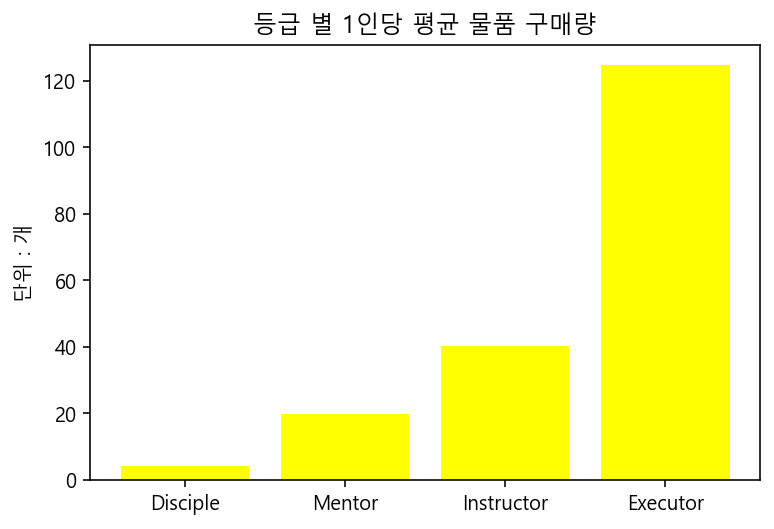

In [95]:
 #등급별 1인 당 평균 구매액


cstq_avg = cstq.groupby(by = 'Class', as_index = False)['Qty'].mean()
cstq_avg.reset_index (drop = True, inplace = True)

#시각화

plt.bar(cstq_avg['Class'],cstq_avg['Qty'], color = 'yellow')
plt.title('등급 별 1인당 평균 물품 구매량')
plt.ylabel('단위 : 개')
plt.show()
 
 

**5) 추가 - 연령대 별 구매량**

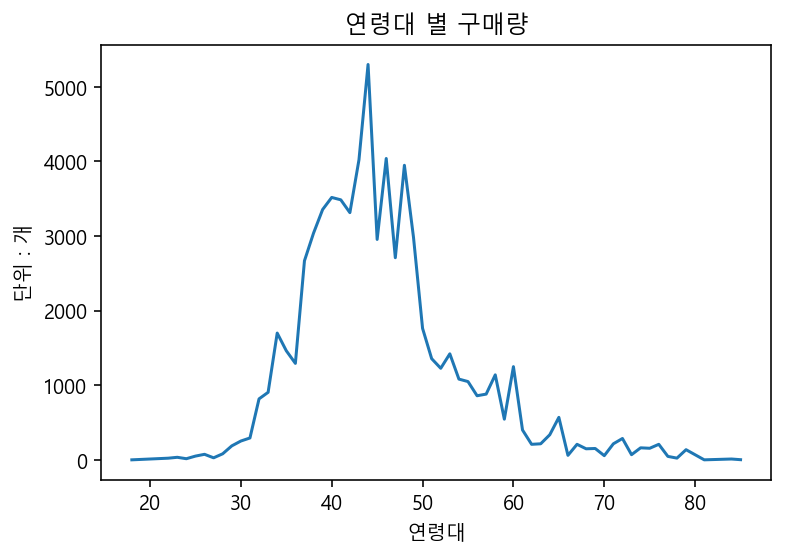

In [96]:
cohort = Sales.groupby(by = 'Age', as_index = False)['Amt'].count()
cohort.sort_values(by = 'Age', ascending = True, inplace = True)

#시각화

plt.plot(cohort['Age'],cohort['Amt'])
plt.ylabel('단위 : 개')
plt.xlabel('연령대')
plt.title('연령대 별 구매량')
plt.show()


**6) 추가 - 지역별 매출액을 시군 단위까지 확장해서 조회**

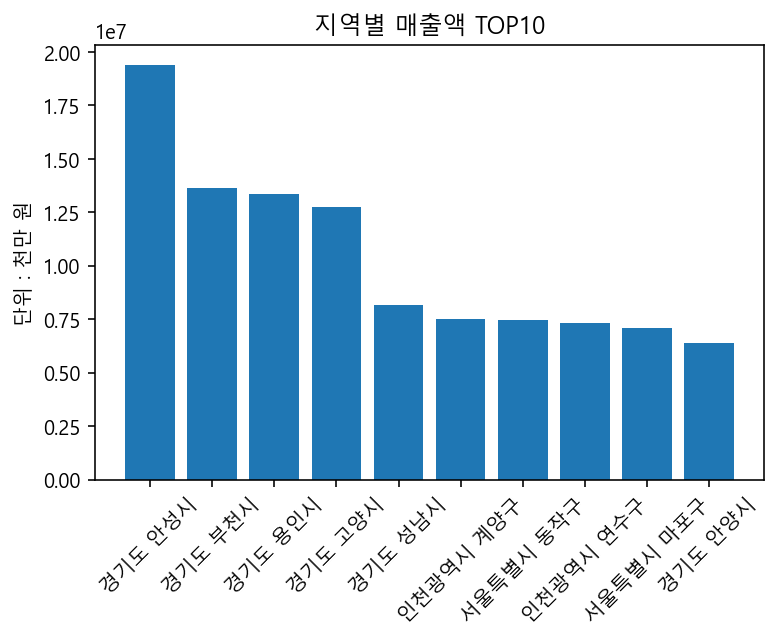

In [97]:
#지역별 매출액(시,군 단위까지)

gen = Sales.groupby(by = ['Addr1','Addr2'], as_index = False)['Amt'].sum()
gen.sort_values(by = 'Amt', ascending = False, inplace = True)
gen = gen.head(10)

plt.bar(gen['Addr1'] + ' ' + gen['Addr2'],gen['Amt'])
plt.title('지역별 매출액 TOP10')
plt.xticks(rotation = 45)
plt.ylabel('단위 : 천만 원')
plt.show()

**7) 추가 - 월별 매출액**

In [98]:
Sales.head()

,ProductName,Category,SubCategory,OrderDate,Price,Qty,Amt,CustomerID,Age,Gender,Addr1,Addr2
0,마늘,채소,뿌리채소,20160102,3150.0,1,3150,c115512,37,여,경기도,김포시
1,마늘,채소,뿌리채소,20160301,3300.0,1,3300,c115512,37,여,경기도,김포시
2,마늘,채소,뿌리채소,20160316,3300.0,1,3300,c115512,37,여,경기도,김포시
3,마늘,채소,뿌리채소,20160828,3100.0,1,3100,c115512,37,여,경기도,김포시
4,마늘,채소,뿌리채소,20161118,3100.0,1,3100,c115512,37,여,경기도,김포시


In [106]:
Sales['OrderDate'] = Sales['OrderDate'].str[0 : 4] + '-' + Sales['OrderDate'].str[4:6]

In [107]:
Sales.head()

,ProductName,Category,SubCategory,OrderDate,Price,Qty,Amt,CustomerID,Age,Gender,Addr1,Addr2
0,마늘,채소,뿌리채소,2016-01,3150.0,1,3150,c115512,37,여,경기도,김포시
1,마늘,채소,뿌리채소,2016-03,3300.0,1,3300,c115512,37,여,경기도,김포시
2,마늘,채소,뿌리채소,2016-03,3300.0,1,3300,c115512,37,여,경기도,김포시
3,마늘,채소,뿌리채소,2016-08,3100.0,1,3100,c115512,37,여,경기도,김포시
4,마늘,채소,뿌리채소,2016-11,3100.0,1,3100,c115512,37,여,경기도,김포시


**7) 추가 - 월별 매출액, 매출수량 정리**

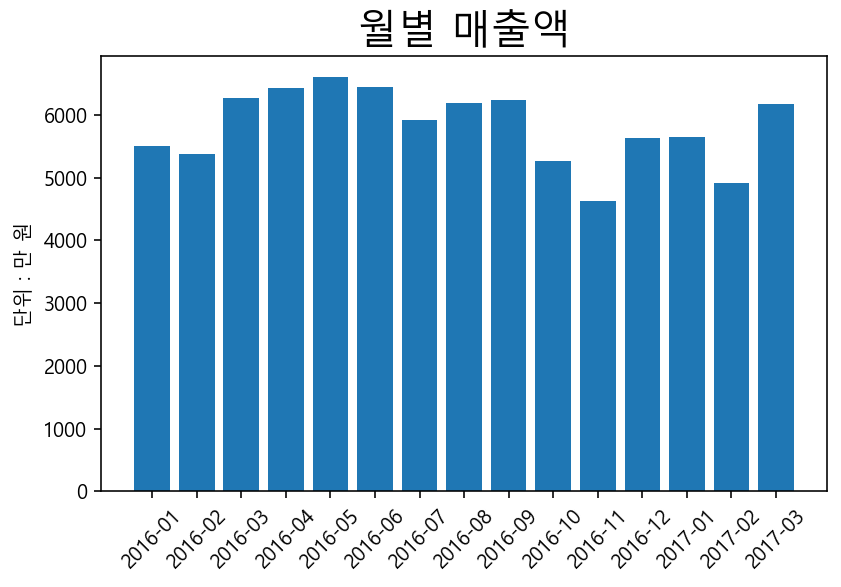

In [122]:
mon = Sales.groupby(by = 'OrderDate', as_index = False)['Qty'].sum()
mon.sort_values(by = 'OrderDate', ascending = True, inplace = True)

plt.figure(figsize =[6.5,4])
plt.bar(mon['OrderDate'],mon['Qty'])
plt.title('월별 매출액', fontsize = 20)
plt.xticks(rotation = 45)
plt.ylabel('단위 : 만 원')
plt.show()                        

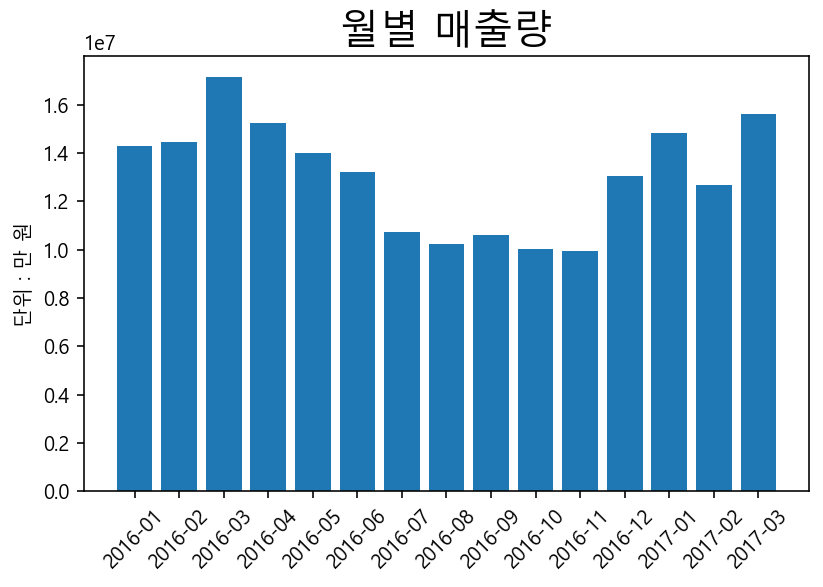

In [123]:
mon = Sales.groupby(by = 'OrderDate', as_index = False)['Amt'].sum()
mon.sort_values(by = 'OrderDate', ascending = True, inplace = True)

plt.figure(figsize =[6.5,4])
plt.bar(mon['OrderDate'],mon['Amt'])
plt.title('월별 매출량', fontsize = 20)
plt.ylabel('단위 : 만 원')
plt.xticks(rotation = 45)
plt.show()

## 7.정리

- 분석을 통해 확인한 내용을 정리합니다.

**1) 의견**






- 성별 구분의 경우 여성 이용자가 압도적으로 많다.
- 60만 원 이상 구매한 이용자들이 매출액에서 차지하는 비중이 높다.
- 고객 거주지는 수도권인 경우가 제일 많고, 그 중에서 경기도인 경우가 제일 많다.
- 이용자의 연령은 40대인 경우가 제일 많고, 중년층의 비중이 제일 높다.
- 종합하면, 경기도에 거주하는 중년 여성의 소비가 매출의 대부분을 차지한다.

**2) 기타**

- 물품 구매량과 구매액은 일정하게 비례한다. 
- 
- 
- 
- 